# Practice: Classification
Predict whether or not someone makes over $50K based on census data

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import platform
from scripts.helper_functions import (describe_numeric_data, records_by_column_value, 
                                      detecting_multicollinearity, plot_histogram, loguniform)
from scripts import about

In [2]:
print(about.__summary__)
print("Python: ",platform.python_version())

The 'scripts' package contains useful data exploration modules.
Python:  3.7.4


In [3]:
# show all cloumns
pd.set_option('display.max_columns', None)

### Retrieve Data
Pull census income data set from the UCI machine learning repository. The main objective is to predict whether income exceeds $50K/yr based on census data.

In [4]:
import requests 

url_names = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names"
r = requests.get(url_names)

print(r.text)

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [ ]:
# url = "https://query.data.world/s/7apm725ton3txdroksdk4lbagmdzbb"

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

df_census = pd.read_csv(url, header=None)
df_census.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
col_names = [
    'age','workclass','fnlwgt',
    'education','education-num',
    'marital-status','occupation',
    'relationship','race','sex',
    'capital-gain','capital-loss',
    'hours-per-week','native-country',
    'income'
]

df_census.columns = col_names
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
detecting_multicollinearity(df_census)

Features that appear to be highly correlated:
	age
	education-num
	hours-per-week

          feature        VIF
0             age   7.246475
1          fnlwgt   3.683144
2   education-num  10.983289
3    capital-gain   1.032987
4    capital-loss   1.056815
5  hours-per-week   9.758094


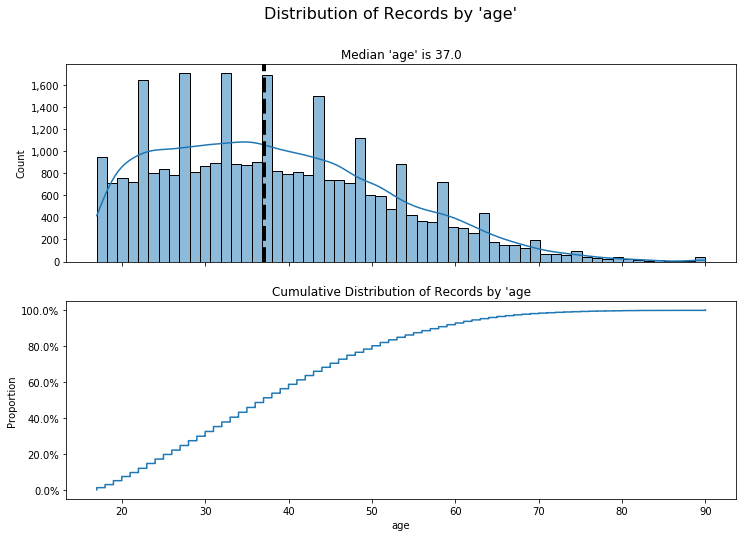

In [9]:
plot_histogram(df_census, col_name='age')

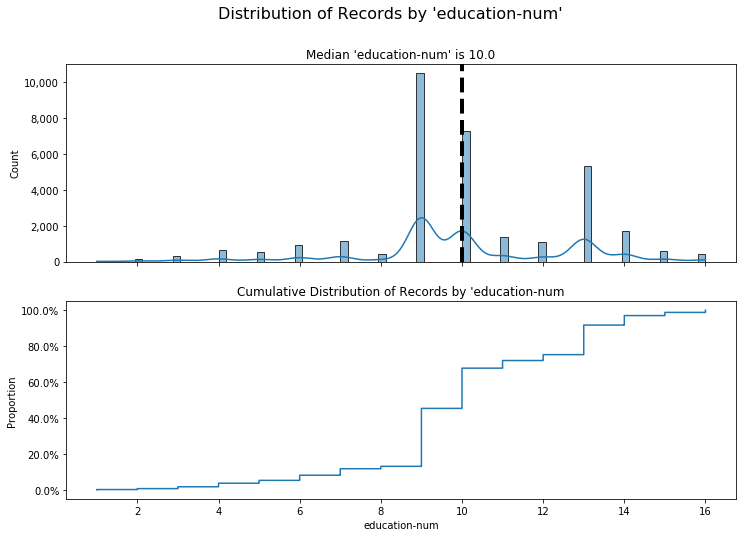

In [10]:
plot_histogram(df_census, col_name='education-num')

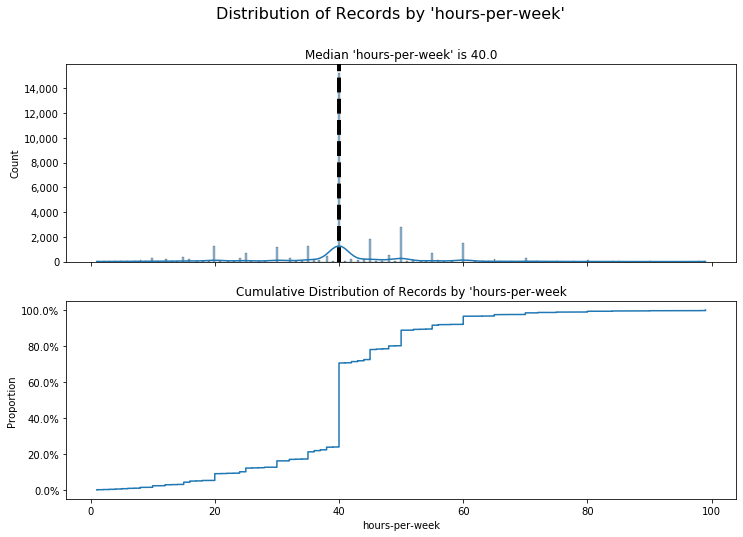

In [13]:
plot_histogram(df_census, col_name='hours-per-week')

In [7]:
records_by_column_value(df_census, col_name='race')

                  race  records  percent_of_toal  cumsum_percent
0                White    27816             0.85            0.85
1                Black     3124             0.10            0.95
2   Asian-Pac-Islander     1039             0.03            0.98
3   Amer-Indian-Eskimo      311             0.01            0.99
4                Other      271             0.01            1.00


In [14]:
records_by_column_value(df_census, col_name='marital-status')

           marital-status  records  percent_of_toal  cumsum_percent
0      Married-civ-spouse    14976             0.46            0.46
1           Never-married    10683             0.33            0.79
2                Divorced     4443             0.14            0.93
3               Separated     1025             0.03            0.96
4                 Widowed      993             0.03            0.99
5   Married-spouse-absent      418             0.01            1.00
6       Married-AF-spouse       23             0.00            1.00


#### Unbalanced Classes
More records showing income equal to and less than \$50K versus greater than \\$50K. The disadvantage is falling into a metric trap were the accuracy score is high only because it's predicting the majority class, in this case those earning equal to or less than \\$50K.

In [8]:
records_by_column_value(df_census, col_name='income')

   income  records  percent_of_toal  cumsum_percent
0   <=50K    24720             0.76            0.76
1    >50K     7841             0.24            1.00


In [ ]:
describe_numeric_data(df_census)

### Prepare Data Set
Machine learning algorithms require that input and output variables be numbers. So, an analyst would need to convert all categorical and other non-numeric data types to numeric.
#### Remove unnecassary columns
The `education` and `education-num` columns seem to represent the same idea, just that one is in a categorical form and the other numeric. We will remove the categorical and keep the numeric column.

In [7]:
df_census.drop(columns=['education'], inplace=True)
df_census.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Encode non-numerical columns into numeric. Encoding in this case is creating new columns based on the values within a particular column, using a **column_value** syntax. For example of the column `sex` where there are two values - Male and Female. Two new columns will be created looking like this - 'sex_Female' and 'sex_Male'. The values within the these columns will be **1** indicatiing the presence and **0** for the absence.  Using the `Pandas.get_dummies` method may incrase memory usage but it is a very useful tool to use on this small data. On larger data sets it is recommedned to utilize sparse matrices. 

In [8]:
df_census_altrd = pd.get_dummies(df_census) 
df_census_altrd.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ ?,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


After the tranaformation we can see that two columns - `income_<=50K` and `income_>50K` - can be used to assert whether someone makes over $50K. We will go ahead and drop the `income_<=50K` column.

In [9]:
df_census_altrd.drop(columns=["income_ <=50K"], inplace=True)
describe_numeric_data(df_census_altrd)

data : 32,561 rows x 93 columns


,count,mean,std,min,25%,50%,75%,max,dtypes,NULLs
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0,int64,0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0,int64,0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0,int64,0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0,int64,0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0,int64,0
...,...,...,...,...,...,...,...,...,...,...
native-country_ Trinadad&Tobago,32561.0,0.000584,0.024149,0.0,0.0,0.0,0.0,1.0,uint8,0
native-country_ United-States,32561.0,0.895857,0.305451,0.0,1.0,1.0,1.0,1.0,uint8,0
native-country_ Vietnam,32561.0,0.002058,0.045316,0.0,0.0,0.0,0.0,1.0,uint8,0
native-country_ Yugoslavia,32561.0,0.000491,0.022162,0.0,0.0,0.0,0.0,1.0,uint8,0


### Split Data

In [10]:
# split into predictor 'X' and response 'y'
X = df_census_altrd.iloc[:,:-1]
y = df_census_altrd.iloc[:,-1]

In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_ >50K, dtype: uint8

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from scripts.models import ClassifierModel

In [12]:
lr_clf = ClassifierModel(X, y, LogisticRegression)
lr_clf.print_accuracy_score()

Completed in 0.67 seconds
Accuracy of LogisticRegression model:  79.65%
F1 score for the LogisticRegression model:  0.394

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6145
           1       0.73      0.27      0.39      1996

    accuracy                           0.80      8141
   macro avg       0.77      0.62      0.64      8141
weighted avg       0.79      0.80      0.76      8141



In [13]:
lr_clf_2 = ClassifierModel(X, y, LogisticRegression, class_weight='balanced')
lr_clf_2.print_accuracy_score()

Completed in 0.52 seconds
Accuracy of LogisticRegression model:  65.69%
F1 score for the LogisticRegression model:  0.435

              precision    recall  f1-score   support

           0       0.82      0.70      0.75      6145
           1       0.36      0.54      0.43      1996

    accuracy                           0.66      8141
   macro avg       0.59      0.62      0.59      8141
weighted avg       0.71      0.66      0.68      8141



Precision-Recall is typically in the range[0.5,1]. The below results is below 50% and is likely due to the unbalanced classes.

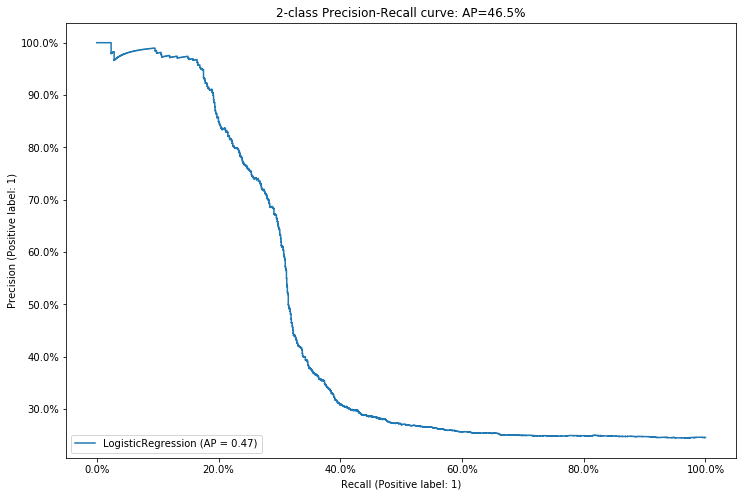

In [14]:
lr_clf.plot_pr_curve();

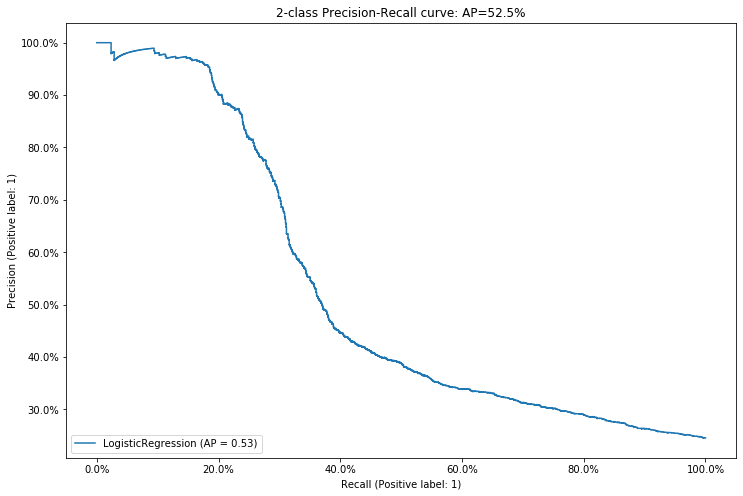

In [15]:
lr_clf_2.plot_pr_curve();

Manually add weights for the classes.

In [21]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
lr = LogisticRegression(solver='newton-cg',random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits=5), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 34.6min finished


In [22]:
gridsearch.best_params_['class_weight']

{0: 0.32834170854271355, 1: 0.6716582914572864}

In [23]:
lr_clf_3 = ClassifierModel(X, y, LogisticRegression, class_weight=gridsearch.best_params_['class_weight'])
lr_clf_3.print_accuracy_score()

Completed in 0.93 seconds
Accuracy of LogisticRegression model:  78.45%
F1 score for the LogisticRegression model:  0.417

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      6145
           1       0.62      0.31      0.42      1996

    accuracy                           0.78      8141
   macro avg       0.71      0.63      0.64      8141
weighted avg       0.76      0.78      0.76      8141



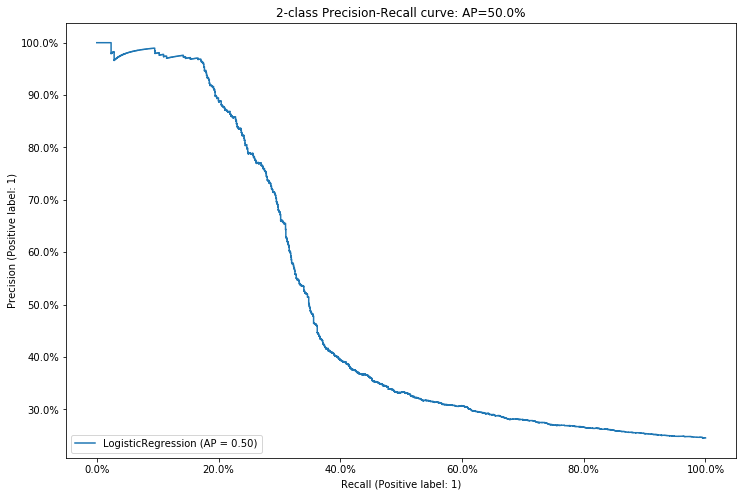

In [24]:
lr_clf_3.plot_pr_curve();

In [21]:
from sklearn.metrics import accuracy_score

lr2 = LogisticRegression(solver='newton-cg', class_weight=gridsearch.best_params_['class_weight'], random_state=2)
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(f"{score: 0.2%}")

 82.88%


Manually creating the weights is no better than setting the `class_weight` parameter to `balanaced`.

In [13]:
from skopt.space import Real, Categorical

In [15]:
"""set parameter distribution for the""" 

solver = ['newton-cg', 'sag', 'liblinear']
penalty = ['l2']

param = {
    'solver': solver,
    'penalty': penalty,
    'C': loguniform(0.01, 100, size=50),
}

param_bayes  = {
    'solver': Categorical(solver),
    'penalty': Categorical(penalty),
    'C': Real(0.01, 100, "log-uniform",),
} 


print("Parameter distributions set.")

Parameter distributions set.


Set up the paramater search algorithms

In [16]:
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [17]:
lr = LogisticRegression(solver='newton-cg', class_weight='balanced', random_state=2)

In [18]:
clf_grid = GridSearchCV(
    estimator = lr,
    param_grid = param,
    scoring = 'f1',
    cv = StratifiedKFold(n_splits=5),
)

In [19]:
clf_rand = RandomizedSearchCV(
    estimator = lr,
    param_distributions = param,
    scoring = 'f1',
    random_state = 2,
    cv = StratifiedKFold(n_splits=5),
)

In [20]:
clf_bayes = BayesSearchCV(
    estimator = lr,
    search_spaces = param_bayes,
    scoring = 'f1',
    random_state = 2,
    cv = StratifiedKFold(n_splits=5),
)

In [21]:
model_grid = ClassifierModel(X, y, clf_grid)
tuple_grid_metric = model_grid.print_cross_val_score()

Completed in 37 minutes
Cross_Val f1 value:  68.35%
Best Paramters:
{'C': 1.0780449180668646e+31, 'penalty': 'l2', 'solver': 'newton-cg'}


In [22]:
model_rand = ClassifierModel(X, y, clf_rand)
tuple_rand_metric = model_rand.print_cross_val_score()

Completed in 3 minutes
Cross_Val f1 value:  68.35%
Best Paramters:
{'solver': 'newton-cg', 'penalty': 'l2', 'C': 5.127623764062176e+24}


In [23]:
model_bayes = ClassifierModel(X, y, clf_bayes)
tuple_bayes_metric = model_bayes.print_cross_val_score()

Completed in 17 minutes
Cross_Val f1 value:  68.35%
Best Paramters:
OrderedDict([('C', 1.1161082385766325), ('penalty', 'l2'), ('solver', 'newton-cg')])


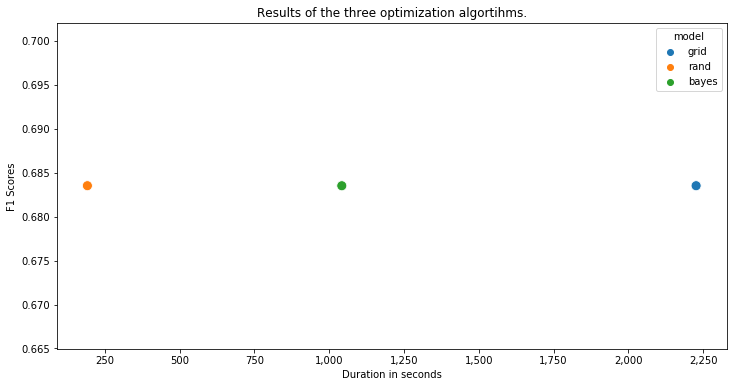

In [24]:
list_names = ['grid','rand','bayes']
list_metric_tuples = [tuple_grid_metric,tuple_rand_metric, tuple_bayes_metric]
list_best_scores = [score.best_score for score in list_metric_tuples]
list_of_duration = [score.duration for score in list_metric_tuples]

dict_metric = {
     'scores': list_best_scores,
     'duration': list_of_duration,
     'model': list_names,
 }

# create dataframe with durations and scores
df_metric = pd.DataFrame(dict_metric)

# plot values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
axis_format = plt.FuncFormatter(lambda x, loc: f"{int(x):,}")
ax = sns.scatterplot(x='duration', y='scores', hue="model", s=100, data=df_metric,)
ax.get_xaxis().set_major_formatter(axis_format)
ax.set(xlabel='Duration in seconds', ylabel='F1 Scores')
plt.title("Results of the three optimization algortihms.")
plt.show();

#### Compare Accuracy
Compare out-of-the-box accuracy of Scikit-learn's `DecisionTreeClassifier` against XGBoost's `XGBClassifier`. The `XGBClassifier` is expected to perform better due to XGBoost's architecture that was design for computational speed and model performance and is dominant machine learning tool in Kaggle competitions.  

In [9]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# import warnings

In [10]:
# silence warnings
# warnings.filterwarnings('ignore')

Decision Tree Accuracy

In [11]:
dt_clf = ClassifierModel(X, y, DecisionTreeClassifier)
dt_clf.print_accuracy_score()

Completed in 0.36 seconds
Accuracy of DecisionTreeClassifier:  81.32%


XGBoost Accuracy

In [12]:
xgb.sklearn.warnings.filterwarnings('ignore')

In [13]:
xgb_clf = ClassifierModel(X, y, xgb.XGBClassifier)
xgb_clf.print_accuracy_score()

[13:16:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Completed in 3.94 seconds
Accuracy of XGBClassifier:  86.56%


### Tuning Hyperparamters for Estimators
How much can we improve the Scikit-learn classifier model's performance?

In [14]:
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

from skopt.space import Real, Integer
from skopt.utils import use_named_args

Set hyperparamters

In [15]:
n_features = X.shape[1]

Set parameter distributions.

In [16]:
"""set parameter distribution for the
GridSearCV algorithm.""" 
params_grid = {
    'max_depth': [None,2,3,4,6,8,10,12,15,20],
    'max_features': ['auto'],
    'min_samples_split': [2,3,5,10,20,40,60,90,100],
    'min_samples_leaf': [1,2,4,6,8,10,20,30],
}

"""set parameter distribution for the
RandomizedSearchCV algorithm.""" 
params_rand = {
    'max_depth': [None,2,3,4,6,8,10,12,15,20],
    'max_features': ['auto'],
    'min_samples_split': [2,3,5,10,20,40,60,90,100],
    'min_samples_leaf': [1,2,4,6,8,10,20,30],
}

"""set parameter distribution for the
BayesSearchCV algorithm. Note the parameters 
are set to the same as the first two algorithms."""
params_bayes  = {
    'max_depth': Integer(1, 20,),
    'max_features': Integer(1, n_features,),
    'min_samples_split': Integer(2, 100,),
    'min_samples_leaf': Integer(1, 30,),
}

"""set parameter distribution for the
BayesSearchCV that is appropriate for this algorithm."""
params_xgb_bayes  = {
    'eta': Real(0.001, 1, "log-uniform",),
    'max_depth': Integer(3, 10,),
    'subsample': Real(0.5, 1.0,),
    'colsample_bytree': Real(0.5, 1.0,),
    'colsample_bylevel': Real(0.5, 1.0,),
}

print("Parameter distributions set.")

Parameter distributions set.


Set up the paramater search algorithms

In [17]:
clf_grid = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = params_grid,
    scoring = 'accuracy',
    cv = 5,
)

In [18]:
clf_rand = RandomizedSearchCV(
    estimator = DecisionTreeClassifier(),
    param_distributions = params_rand,
    scoring = 'accuracy',
    random_state = 2,
    cv = 5,
)

In [19]:
clf_bayes = BayesSearchCV(
    estimator = DecisionTreeClassifier(),
    search_spaces = params_bayes,
    scoring = 'accuracy',
    random_state = 2,
    cv = 5,
)

Run models and compare performance

In [20]:
model_grid = ClassifierModel(X, y, clf_grid)
tuple_grid_metric = model_grid.print_cross_val_score()

Completed in 3 minutes
Cross_Val Accuracy:  84.68%
Best Paramters:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 60}


In [21]:
model_rand = ClassifierModel(X, y, clf_rand)
tuple_rand_metric = model_rand.print_cross_val_score()

Completed in 2.83 seconds
Cross_Val Accuracy:  84.51%
Best Paramters:
{'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': None}


In [22]:
model_bayes = ClassifierModel(X, y, clf_bayes)
tuple_bayes_metric = model_bayes.print_cross_val_score()

Completed in 2 minutes
Cross_Val Accuracy:  85.70%
Best Paramters:
OrderedDict([('max_depth', 20), ('max_features', 71), ('min_samples_leaf', 30), ('min_samples_split', 100)])


Best Scores

In [23]:
grid_score = clf_grid.best_score_
rand_score = clf_rand.best_score_
bayes_score = clf_bayes.best_score_

print(f"Best Scores:\nGrid {grid_score:0.2%}\nRandom {rand_score:0.2%}\nBayes {bayes_score:0.2%}")

Best Scores:
Grid 84.68%
Random 84.51%
Bayes 85.70%


Collect sores and durations

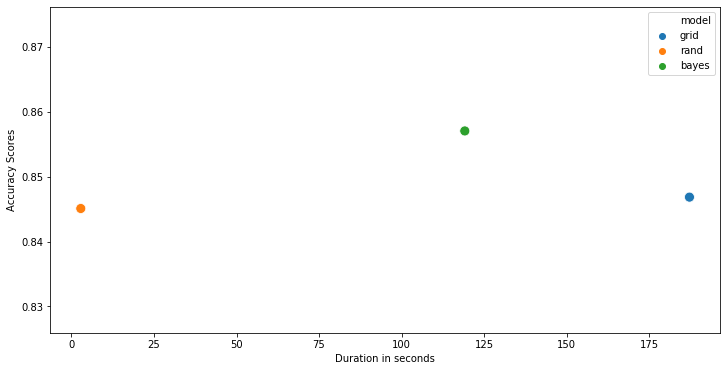

In [25]:
list_names = ['grid','rand','bayes']
list_metric_tuples = [tuple_grid_metric,tuple_rand_metric, tuple_bayes_metric]
list_best_scores = [score.best_score for score in list_metric_tuples]
list_of_duration = [score.duration for score in list_metric_tuples]

dict_metric = {
     'scores': list_best_scores,
     'duration': list_of_duration,
     'model': list_names,
 }

# create dataframe with durations and scores
df_metric = pd.DataFrame(dict_metric)

# plot values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='duration', y='scores', hue="model", s=100, data=df_metric,)
ax.set(xlabel='Duration in seconds', ylabel='Accuracy Scores')
plt.show();

Test the `BayesSearchCV` on an XGBoost estimator.

In [26]:
clf_xgb_bayes = BayesSearchCV(
    estimator = xgb.XGBClassifier(verbosity=0),
    search_spaces = params_bayes,
    scoring = 'accuracy',
    random_state = 2,
    cv = 5,
)

model_xgb_bayes = ClassifierModel(X, y, clf_xgb_bayes)
model_xgb_bayes.print_cross_val_score()

Completed in 27 minutes
Cross_Val Accuracy:  87.25%
Best Paramters:
OrderedDict([('max_depth', 5), ('max_features', 11), ('min_samples_leaf', 29), ('min_samples_split', 95)])


Metric(best_score=0.8725162003623967, duration=1609.2777061462402)

Using a parameter that's tailored to the XGBoost library.

In [27]:
clf_xgb_bayes = BayesSearchCV(
    estimator = xgb.XGBClassifier(verbosity=0),
    search_spaces = params_xgb_bayes,
    scoring = 'accuracy',
    random_state = 2,
    cv = 5,
)

model_xgb_bayes = ClassifierModel(X, y, clf_xgb_bayes)
model_xgb_bayes.print_cross_val_score()

Completed in 15 minutes
Cross_Val Accuracy:  87.46%
Best Paramters:
OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.5), ('eta', 0.18582090119998787), ('max_depth', 5), ('subsample', 1.0)])


Metric(best_score=0.8746045883111698, duration=929.0207009315491)